<a href="https://colab.research.google.com/github/Kim-jinju/Section1_Project/blob/main/%5B%EC%9E%AC%EC%A0%9C%EC%B6%9C%5D_Section1_Project_AI_14_%EA%B9%80%EC%A7%84%EC%A3%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Section1 Project] 다음 분기에 어떤 게임을 설계해야 할까

### 1. 지역에 따라 선호하는 게임 장르가 다를까
### 2. 연도별 게임의 트렌드가 있을까
##### 데이터 내 트렌드로 볼 만한 요소들은 장르, 플랫폼, 제작 회사가 있음
### 3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스
##### 출고량 높은 게임을 산출한 뒤, 해당 게임들의 장르, 플랫폼, 제작 회사를 분석할 수 있음
### 4. 다음 분기 게임 설계 최종 결론
##### 판매 안정성을 고려한 설계와 새로운 시장 도전을 위한 설계 방안을 고려할 수 있음

## 0. 데이터 전처리

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import files
files.upload()

In [ ]:
df = pd.read_csv('vgames2.csv', index_col = 0)  
# 이미 csv 파일 내에 index column이 있기 때문에 index_col = 0으로 설정하지 않으면 unnamed column이 생성됨

df.shape

(16598, 9)

In [ ]:
df.info()
# year은 integer 형태, 각 시장의 Sales는 float 형태를 띄어야 함
# 일부 결측치 발생함

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.3+ MB


In [ ]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


### 0.1 결측치 처리

In [ ]:
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [ ]:
df_null = pd.DataFrame(df.isnull().sum(), columns = ['isnull'])
df_null.reset_index(inplace = True)
df_null['isnull'].sum()

379

[링크 텍스트](https://coding-moomin.tistory.com/28)

df.isnull().sum()을 columns를 지정해 dataframe 형태로 만들면 index에 df의 각 열, columns에 null값의 개수가 들어간다
이때 reset_index 후 drop을 default값인 false로 지정하면 기존 index였던 df 열이 index 행으로 생성된다

In [ ]:
df_null['isnull'].sum() / len(df)
# 전체 df 중 결측치의 비율은 약 2%에 불과하므로 대체하기 위해 시간을 쓰는 대신 제거한다

0.022834076394746355

In [ ]:
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  float64
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  object 
 6   EU_Sales     16241 non-null  object 
 7   JP_Sales     16241 non-null  object 
 8   Other_Sales  16241 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.2+ MB


In [ ]:
df.reset_index(drop = True, inplace = True)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16237,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16238,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16239,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


### 0.2 연도 columns 처리

In [ ]:
df['Year'] = df['Year'].astype('int')

# 연도를 integer 형태로 변환한다

In [ ]:
df['Year'].sort_values()

# 연도에 0000 형태로 되어 있지 않은 행을 발견하였다

9094        0
16042       0
14352       0
2206        1
8507        1
         ... 
1758     2016
9911     2017
5196     2017
14903    2017
6765     2020
Name: Year, Length: 16241, dtype: int64

In [ ]:
year_corr = df[df['Year'] < 1900].index
year_corr

Int64Index([   72,    79,   210,   299,   758,   894,  1001,  1204,  1343,
             1388,  1656,  2206,  2383,  2408,  2421,  2497,  2790,  2965,
             2988,  3051,  3423,  3671,  3801,  3929,  3995,  4229,  4274,
             4625,  4644,  4698,  4705,  4737,  5083,  5200,  5824,  5989,
             6005,  6033,  6065,  6758,  6912,  7032,  7038,  7215,  7406,
             7451,  7477,  7689,  7983,  8030,  8341,  8379,  8412,  8507,
             8591,  8664,  8735,  8751,  8902,  9094,  9109,  9143,  9700,
            10113, 10151, 10199, 10200, 10410, 10493, 10596, 10703, 10939,
            11010, 11037, 11104, 11283, 11712, 12124, 12234, 12372, 12599,
            13447, 13855, 14261, 14352, 14470, 14915, 14930, 14933, 15105,
            15110, 15151, 15173, 15273, 15493, 15641, 15756, 15801, 16042,
            16127],
           dtype='int64')

In [ ]:


# for i in range(len(df)):
#   if df.iloc[i]['Year'] < 1900:
#     year_str = df.iloc[i]['Year']
#     if year_str < 21:
#       year_str = '{0:02d}'.format(df.iloc[i]['Year'])
#       df.iloc[i]['Year'] = '20' + year_str
#     else:
#       df.iloc[i]['Year'] = '19' + str(year_str)

# df[df['Year'] < 1900]

In [ ]:
df_twenty_zero = df[df['Year'] < 10]
df_twenty_zero['Year'] = df_twenty_zero['Year'].astype('str')
df_twenty_zero['Year'] = '200' + df_twenty_zero['Year']
df_twenty_zero.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(53, 9)

In [ ]:
df_twenty_ten = df[(df['Year'] >= 10) & (df['Year'] < 23)]
df_twenty_ten['Year'] = df_twenty_ten['Year'].astype('str')
df_twenty_ten['Year'] = '20' + df_twenty_ten['Year']
df_twenty_ten.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(33, 9)

In [ ]:
df_ninety = df[(df['Year'] < 100) & (df['Year'] > 23)]
df_ninety['Year'] = df_ninety['Year'].astype('str')
df_ninety['Year'] = '19' + df_ninety['Year']
df_ninety.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(14, 9)

In [ ]:
df.drop(df[df['Year'] < 1900].index, inplace=True)
df_clean = pd.concat([df, df_twenty_zero, df_twenty_ten, df_ninety])

In [ ]:
df_clean.iloc[year_corr]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
73,Deadliest Catch: Sea of Chaos,PS3,2010,Sports,Crave Entertainment,0.08,0,0,0.01
81,Billy Hatcher and the Giant Egg,GC,2003,Platform,Sega,0.19,0.05,0,0.01
213,Phantom Crash,XB,2002,Simulation,Phantagram,0.03,0.01,0.01,0
303,Warriors Orochi 2,PSP,2008,Action,Tecmo Koei,0.06,0,0.22,0.01
763,W.L.O. Sekai Renai Kikousen,X360,2010,Adventure,5pb,0,0,0.02,0
...,...,...,...,...,...,...,...,...,...
15737,Blues Brothers 2000,N64,2000,Platform,Virgin Interactive,0.04,0.01,0,0
15854,Ken Griffey Jr.'s Slugfest,N64,1999,Sports,Nintendo,0.23,0.06,0,0
15899,Motocross Mania,PS,2001,Racing,Take-Two Interactive,0.44,0.3,0,0.05
16142,Call of Duty: Advanced Warfare,PC,2014,Shooter,Activision,0.14,0.23,0,0.04


In [ ]:
df_clean.reset_index(drop = True, inplace = True)
df_clean.shape

(16241, 9)

In [ ]:
df_clean['Year'] = df_clean['Year'].astype('str')
df_clean['Year'].sort_values()

13875    1980
14605    1980
9861     1980
8986     1980
12778    1980
         ... 
14652    2016
5163     2017
14817    2017
9848     2017
6725     2020
Name: Year, Length: 16241, dtype: object

In [ ]:
df_clean.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04


### 0.3 Sales columns 처리

In [ ]:
df_clean.loc[:, 'NA_Sales': 'Other_Sales'] = df.iloc[:, 5:].astype('float')

# Sales 열에 string이 존재하기 때문에 float로 변환할 수 없음

ValueError: ignored

In [ ]:
df_clean.sample(10)

# 샘플링한 결과 Sales에 K, M이 존재하는 행 있음

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
267,Twisted Metal: Black,PS2,2001,Racing,Sony Computer Entertainment,1.19,0.17,0,0.05
14851,Tales of the World: Radiant Mythology 3,PSP,2011,Role-Playing,Namco Bandai Games,0,0,0.28,0M
4889,Monster Hunter Diary: Poka Poka Airou Village DX,3DS,2015,Action,Capcom,0,0,0.14,0
2817,Hanagumi Taisen Columns,SAT,1997,Puzzle,Sega,0,0,0.12,0
3345,Daniel X: The Ultimate Power,DS,2010,Action,THQ,0.07,0,0,0.01
2793,Spider-Man: Edge of Time,DS,2011,Action,Activision,0.12,0.01,0,0.01
9321,SplashDown,XB,2002,Racing,Atari,0.09,0.02,0,0
8802,Army Men 3D,PS,1999,Action,3DO,1.1,0.14,0,0.04
5433,The New York Times Crosswords,DS,2007,Puzzle,Majesco Entertainment,0.42,0,0,0.03
2899,Namco Museum Vol.3,PS,1996,Misc,Sony Computer Entertainment,2.28,1.55,0.16,0.06


In [ ]:
import re

def has_K(inputString):
  return bool(re.search('K', inputString))

def has_M(inputString):
  return bool(re.search('M', inputString))

In [ ]:
col_list = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

In [ ]:
# # for col in col_list:
# #   str_con = df_clean[col].apply(has_K)
# #   has_str_names = df_clean[str_con]
# #   print(has_str_names)
# #   print(len(has_str_names))

# str_con = df_clean[col_list[0]].apply(has_K)
# has_str_names = df_clean[str_con]
# has_str_scale_NA = df_clean[str_con]
# has_str_names[col_list[0]] = has_str_names[col_list[0]].str.extract('(\d+)').astype('float')
# has_str_scale_NA[col_list[0]] = has_str_names[col_list[0]] / 1000

# str_con = df_clean[col_list[1]].apply(has_K)
# has_str_names = df_clean[str_con]
# has_str_scale_EU = df_clean[str_con]
# has_str_names[col_list[1]] = has_str_names[col_list[1]].str.extract('(\d+)').astype('float')
# has_str_scale_EU[col_list[1]] = has_str_names[col_list[1]] / 1000

# str_con = df_clean[col_list[2]].apply(has_K)
# has_str_names = df_clean[str_con]
# has_str_scale_JP = df_clean[str_con]
# has_str_names[col_list[2]] = has_str_names[col_list[2]].str.extract('(\d+)').astype('float')
# has_str_scale_JP[col_list[2]] = has_str_names[col_list[2]] / 1000

# str_con = df_clean[col_list[3]].apply(has_K)
# has_str_names = df_clean[str_con]
# has_str_scale_Other = df_clean[str_con]
# has_str_names[col_list[3]] = has_str_names[col_list[3]].str.extract('(\d+)').astype('float')
# has_str_scale_Other[col_list[3]] = has_str_names[col_list[3]] / 1000

In [ ]:
# for col in col_list:
#   str_con = df_clean[col].apply(has_K)
#   df_clean.drop(df_clean[str_con].index, inplace = True)

# df_final = pd.concat([df_clean, has_str_scale_NA, has_str_scale_EU, has_str_scale_JP, has_str_scale_Other])
# df_final.shape

# 이러면 겹치는 행 발생함

(16246, 9)

In [ ]:
for col in col_list:
  str_con = df_clean[col].apply(has_K)
  has_str_names = df_clean[str_con]
  print(has_str_names)
  print(len(has_str_names))

for col in col_list:
  str_con = df_clean[col].apply(has_M)
  has_str_names = df_clean[str_con]
  print(has_str_names)
  print(len(has_str_names))

TypeError: ignored

In [ ]:
# 다른 분들의 코드 참고
for col in col_list:
  df_clean[col] = df_clean[col].str.replace('K', 'e-3')
  df_clean[col] = df_clean[col].str.replace('M', '')
  df_clean[col] = df_clean[col].astype(float)

In [ ]:
for col in col_list:
  print(df_clean[col].sort_values())

8120      0.00
7764      0.00
7763      0.00
7760      0.00
7756      0.00
         ...  
12237    15.85
1180     23.20
10213    26.93
4088     29.08
2838     41.49
Name: NA_Sales, Length: 16241, dtype: float64
0         0.00
8237      0.00
8235      0.00
8232      0.00
8231      0.00
         ...  
3394      9.27
10843    11.00
3268     11.01
12237    12.88
2838     29.02
Name: EU_Sales, Length: 16241, dtype: float64
0         0.00
8988      0.00
8989      0.00
8993      0.00
8994      0.00
         ...  
10278     6.04
6756      6.50
4088      6.81
9171      7.20
7626     10.22
Name: JP_Sales, Length: 16241, dtype: float64
0         0.00
8540      0.00
8536      0.00
8535      0.00
8533      0.00
         ...  
12237     3.31
3394      4.14
14267     7.53
2838      8.46
14270    10.57
Name: Other_Sales, Length: 16241, dtype: float64


In [ ]:
df_clean.iloc[2838]

Name           Wii Sports
Platform              Wii
Year                 2006
Genre              Sports
Publisher        Nintendo
NA_Sales            41.49
EU_Sales            29.02
JP_Sales             3.77
Other_Sales          8.46
Name: 2855, dtype: object

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16241 entries, 0 to 16240
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  object 
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  float64
 6   EU_Sales     16241 non-null  float64
 7   JP_Sales     16241 non-null  float64
 8   Other_Sales  16241 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.1+ MB


### 0.4 플랫폼 종류 확인

In [ ]:
df_clean.Platform.value_counts()

DS      2127
PS2     2121
PS3     1299
Wii     1284
X360    1231
PSP     1193
PS      1185
PC       935
XB       799
GBA      784
GC       541
3DS      498
PSV      409
PS4      335
N64      313
SNES     239
XOne     212
SAT      173
WiiU     143
2600     115
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [ ]:
df_clean.Publisher.value_counts()

Electronic Arts                 1332
Activision                       963
Namco Bandai Games               924
Ubisoft                          913
Konami Digital Entertainment     821
                                ... 
Panther Software                   1
Playmore                           1
mixi, Inc                          1
HAL Laboratory                     1
Inti Creates                       1
Name: Publisher, Length: 575, dtype: int64

In [ ]:
df_clean.groupby('Year')['NA_Sales'].sum()

Year
1980    10.13
1981    33.40
1982    26.92
1983     7.76
1984    33.28
        ...  
2012     0.29
2013     0.00
2014     1.46
2015     0.00
2016     1.30
Name: NA_Sales, Length: 62, dtype: float64

In [ ]:
df_clean['Year'].unique()

array(['2008', '2009', '2010', '2005', '2011', '2007', '2001', '2003',
       '2006', '2014', '2015', '2002', '1997', '2013', '1996', '2004',
       '2000', '1984', '1998', '2016', '1985', '1999', '1995', '1993',
       '2012', '1987', '1982', '1994', '1990', '1992', '1991', '1983',
       '1988', '1981', '1989', '1986', '2017', '1980', '2020'],
      dtype=object)

### 0.5 총 출고량 columns 추가

In [ ]:
df_clean['All_Sales'] = df_clean[col_list].sum(axis = 1)

In [ ]:
df_clean.iloc[4861]

Name           Hot Wheels World Race
Platform                         PS2
Year                            2003
Genre                         Racing
Publisher                        THQ
NA_Sales                        0.21
EU_Sales                        0.16
JP_Sales                         0.0
Other_Sales                     0.05
All_Sales                       0.42
Name: 4893, dtype: object

In [ ]:
df_clean = df_clean.sort_values('Year')
df_clean.reset_index(drop=True, inplace = True)

In [ ]:
df_clean

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,All_Sales
0,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.00,0.01,0.77
1,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.00,0.03,2.76
2,Defender,2600,1980,Misc,Atari,0.99,0.05,0.00,0.01,1.05
3,Bridge,2600,1980,Misc,Activision,0.25,0.02,0.00,0.00,0.27
4,Freeway,2600,1980,Action,Activision,0.32,0.02,0.00,0.00,0.34
...,...,...,...,...,...,...,...,...,...,...
16236,Resident Evil: Umbrella Corps,PS4,2016,Action,Capcom,0.00,0.00,0.02,0.00,0.02
16237,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01
16238,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01
16239,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03


In [ ]:
year_list = list(set(df_clean['Year']))
year_list.sort()
year_list

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2020']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


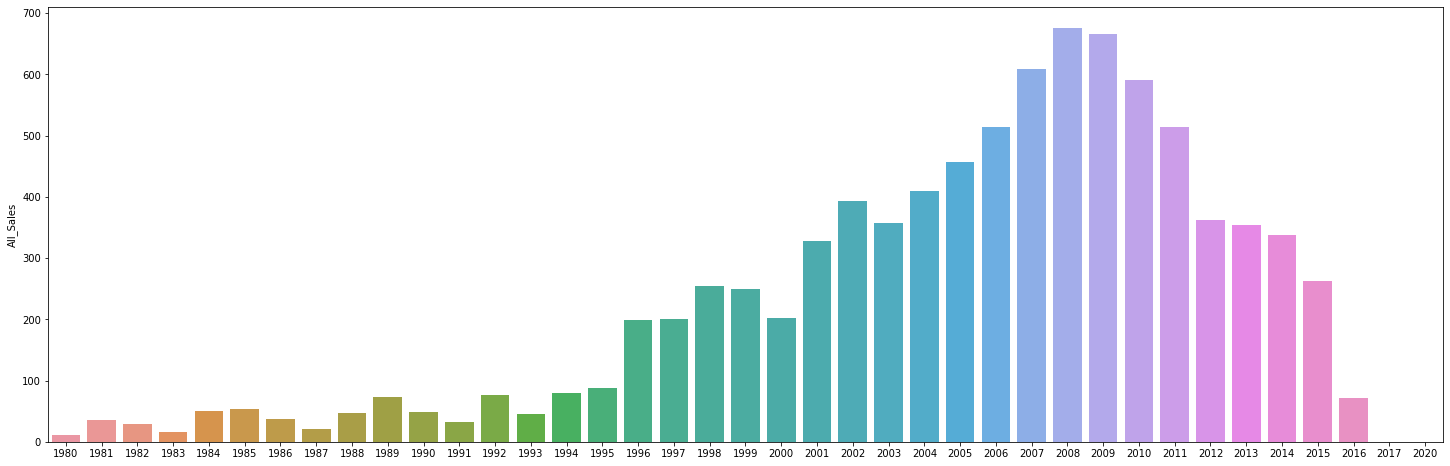

In [ ]:
plt.figure(figsize = (25, 8))
sns.barplot(year_list, df_clean['All_Sales'].groupby(df_clean['Year']).sum())

## 1. 지역별 장르 선호도

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

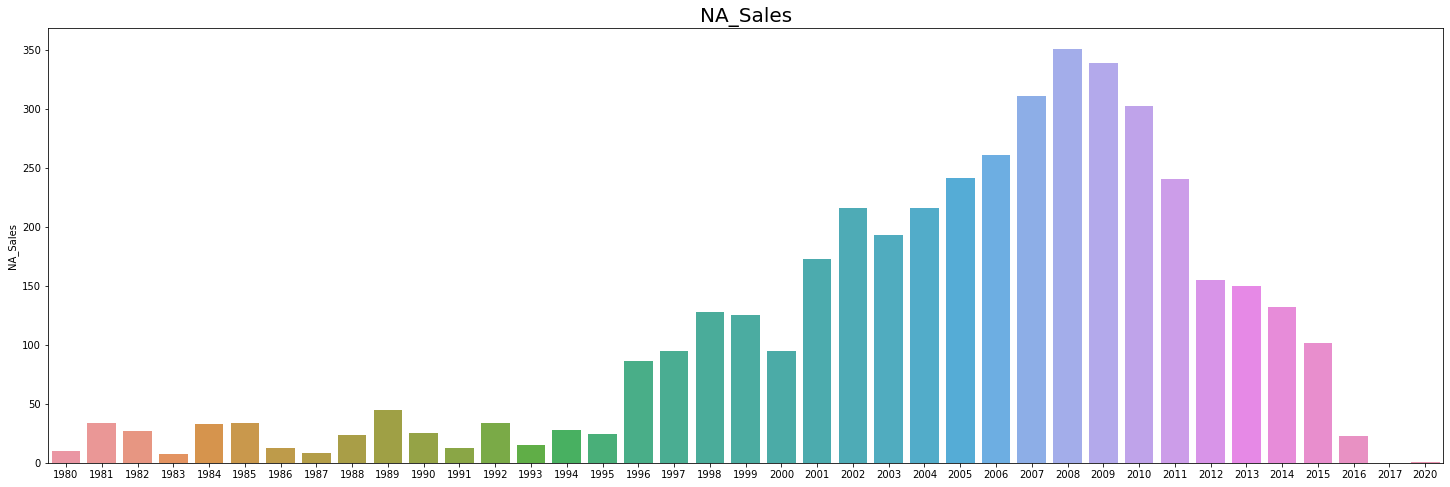

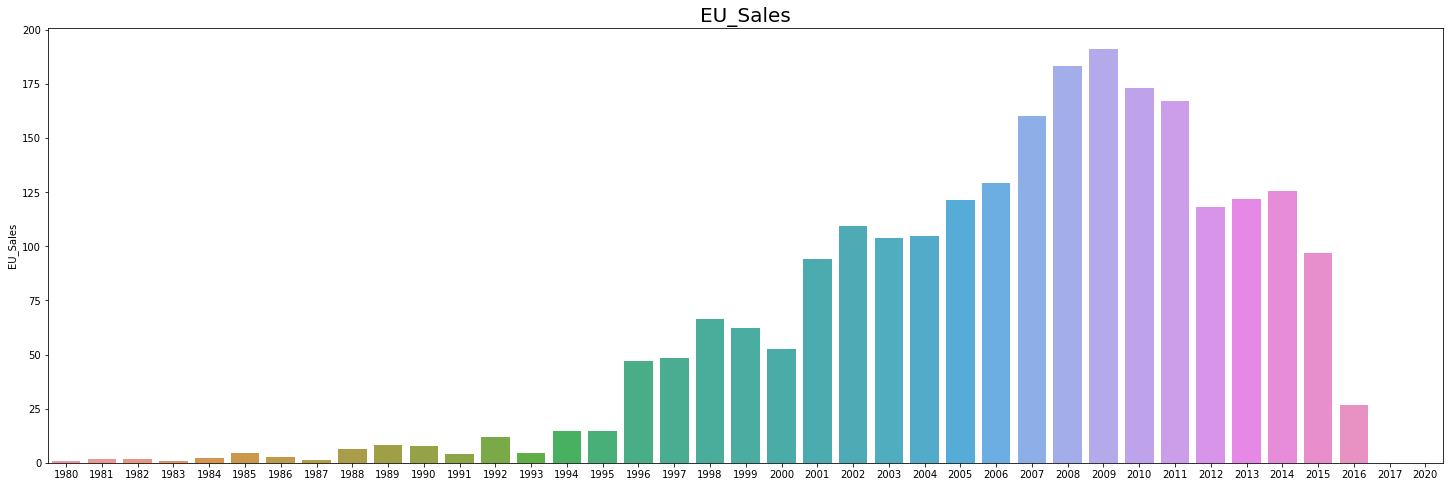

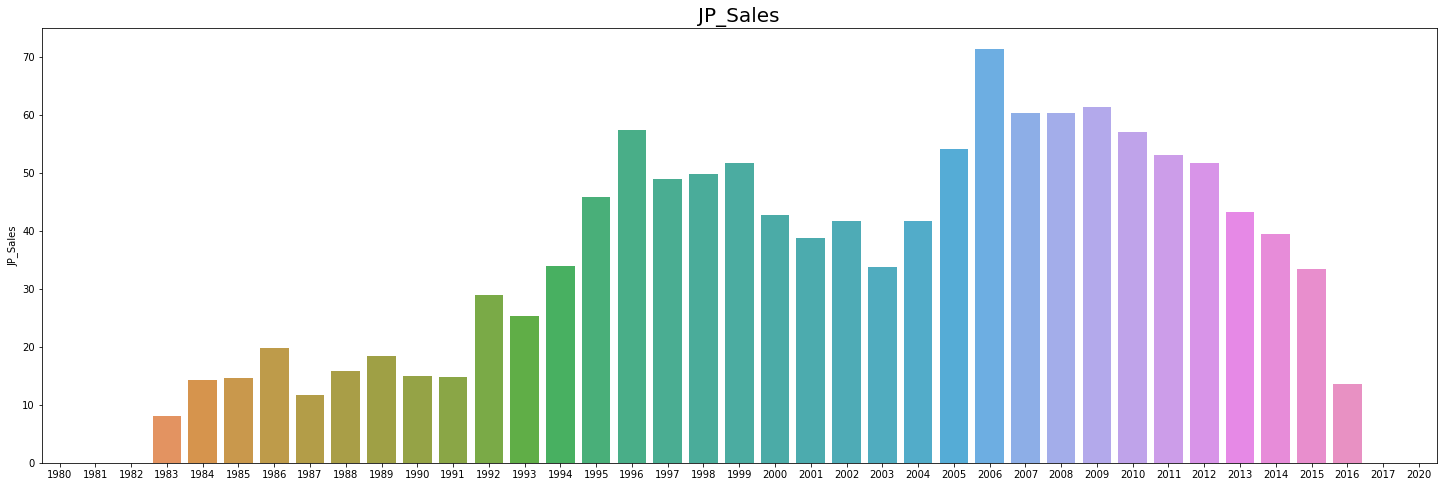

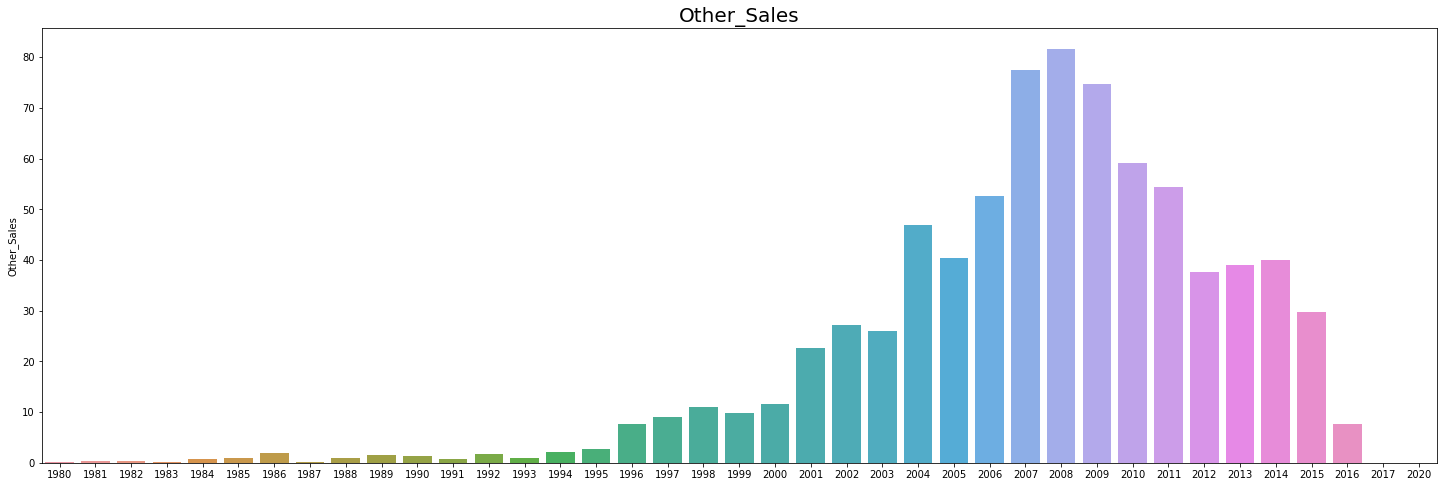

In [ ]:
for col in col_list:
  plt.figure(figsize = (25, 8))
  plt.title(col, fontsize = 20)
  # plt.ylim((0, 350))
  sns.barplot(year_list, df_clean[col].groupby(df_clean['Year']).sum())

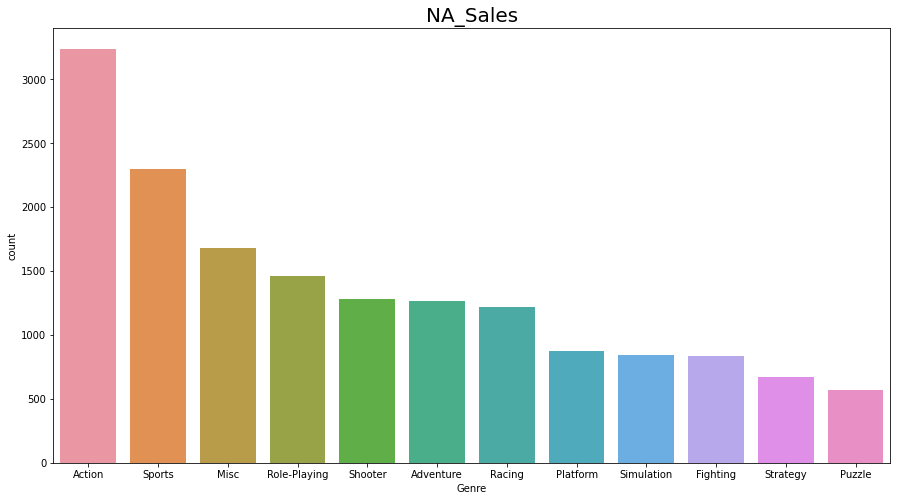

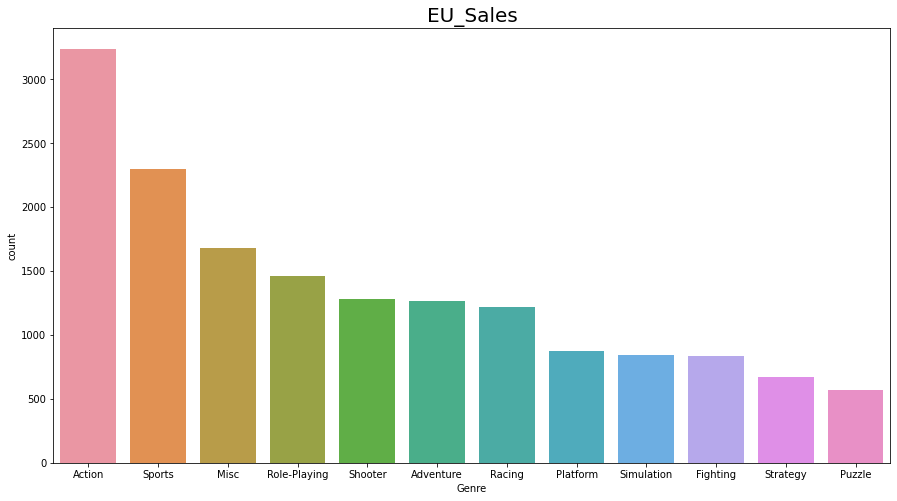

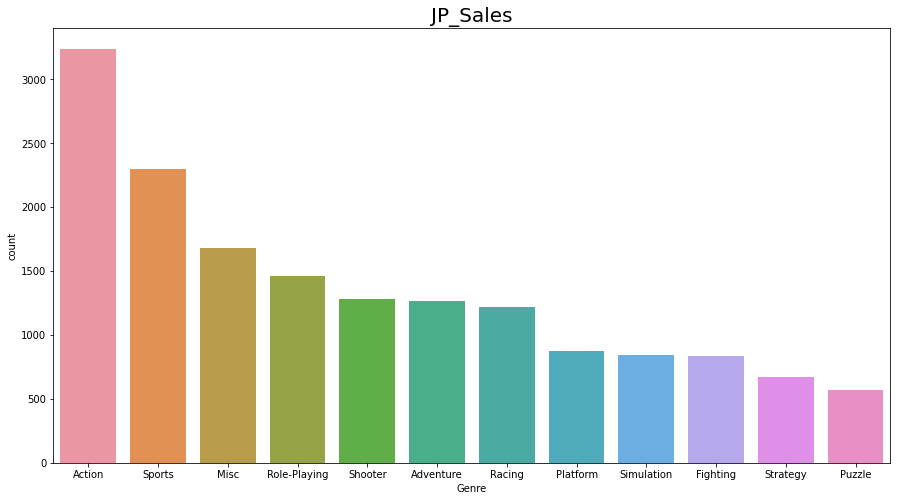

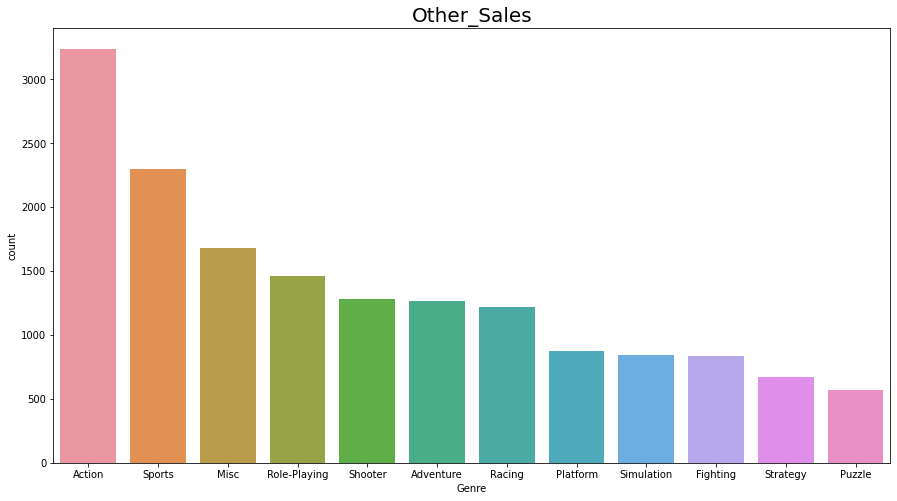

In [ ]:
for col in col_list:
  plt.figure(figsize = (15, 8))
  plt.title(col, fontsize = 20)
  # sns.barplot(x = list(set(df_clean['Genre'])), y = df_clean[col].groupby(df_clean['Genre']).sum())
  # sns.barplot(x = 'Genre', data = df_clean, y = df_clean[col].groupby('Genre').sum())
  sns.countplot(data = df_clean, x = 'Genre', order = df_clean['Genre'].value_counts().index)

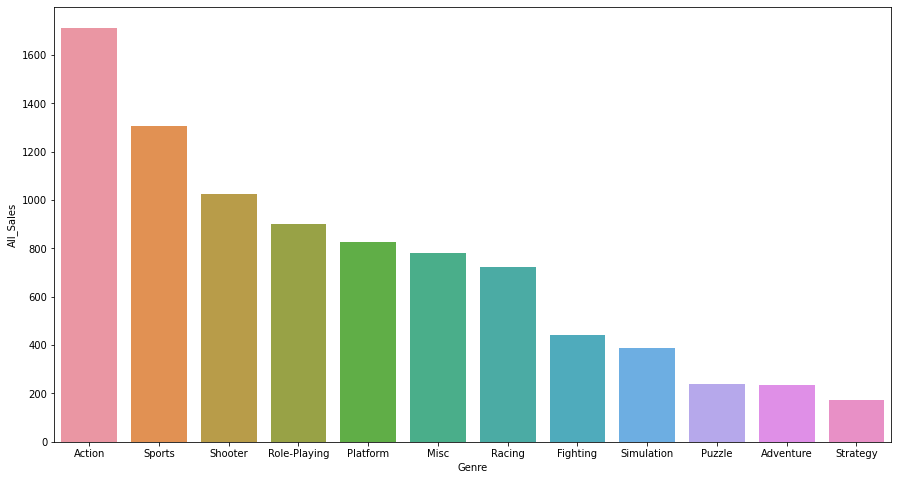

In [ ]:
# for col in col_list:
plt.figure(figsize = (15, 8))
# plt.title(col, fontsize = 20)
# sns.barplot(x = list(set(df_clean['Genre'])), y = df_clean[col].groupby(df_clean['Genre']).sum())
# sns.barplot(df_clean.groupby('Genre').sum())
  # sns.countplot(data = df_clean, x = 'Genre', order = df_clean['Genre'].value_counts().index)
# df_clean.groupby('Genre').sum()

data_genre = df_clean.groupby('Genre')[['All_Sales']].sum()
data_genre.reset_index(inplace = True)
data_genre.sort_values(by = ['All_Sales'], ascending = False, inplace = True)
data_genre
sns.barplot(x = data_genre['Genre'], y = data_genre['All_Sales'])

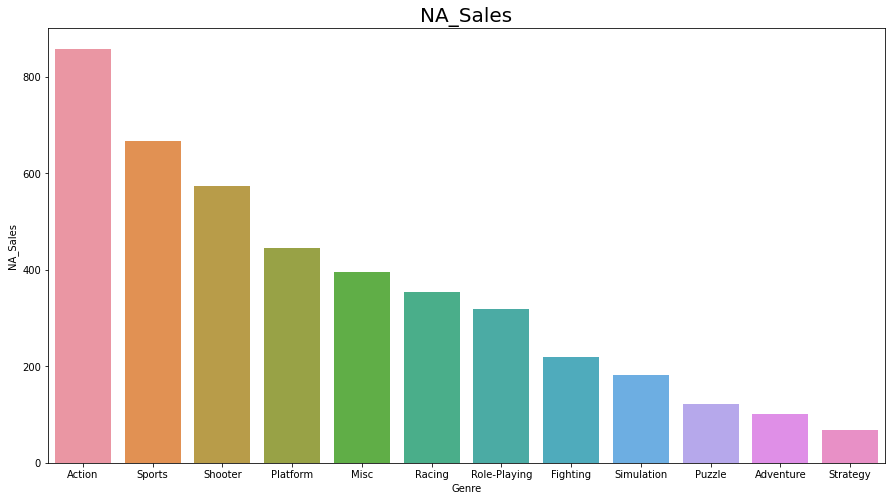

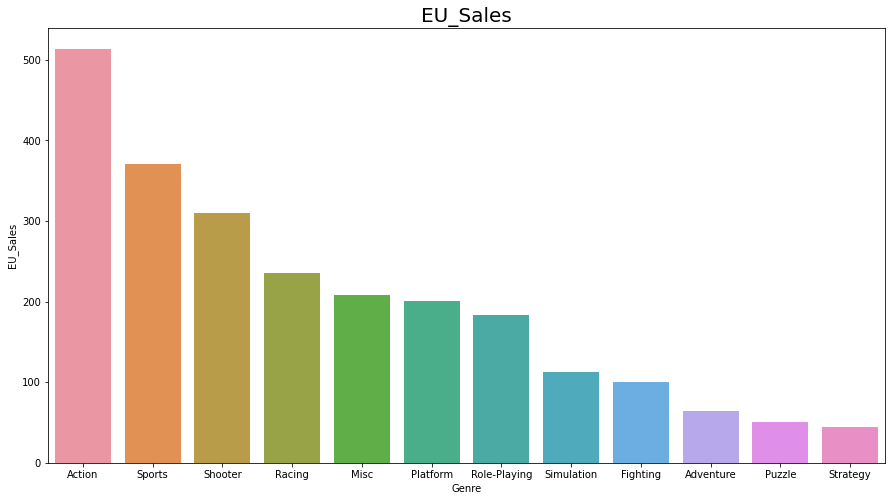

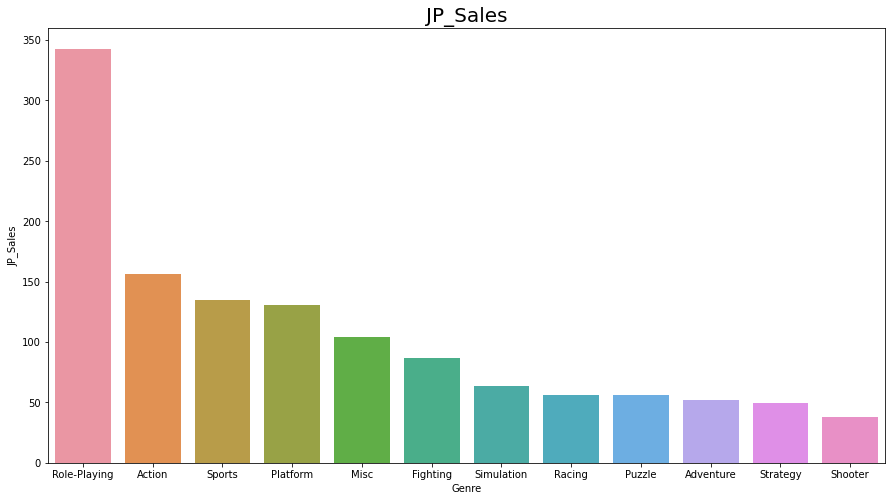

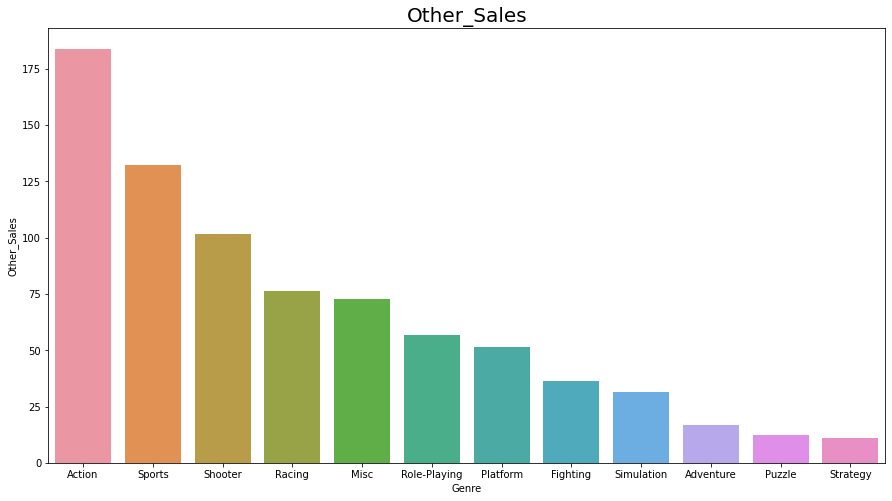

In [ ]:
for col in col_list:
  plt.figure(figsize = (15, 8))
  plt.title(col, fontsize = 20)
  data_genre = df_clean.groupby('Genre')[[col]].sum()
  data_genre.reset_index(inplace = True)
  data_genre.sort_values(by = [col], ascending = False, inplace = True)
  data_genre
  sns.barplot(x = data_genre['Genre'], y = data_genre[col])

In [ ]:
df_clean.groupby('Genre').sum()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,All_Sales
Genre,,,,,
Action,858.75,513.64,156.60,183.99,1712.98
Adventure,101.79,63.66,51.87,16.70,234.02
Fighting,220.35,99.90,87.14,36.15,443.54
Misc,394.73,208.15,104.18,72.64,779.70
Platform,445.38,200.63,130.53,51.45,827.99
Puzzle,121.58,50.47,56.24,12.44,240.73
Racing,354.70,235.02,56.32,76.51,722.55
Role-Playing,318.76,183.09,342.93,56.73,901.51
Shooter,574.48,310.23,38.18,101.86,1024.75


## 2. 연도별 트렌드 확인

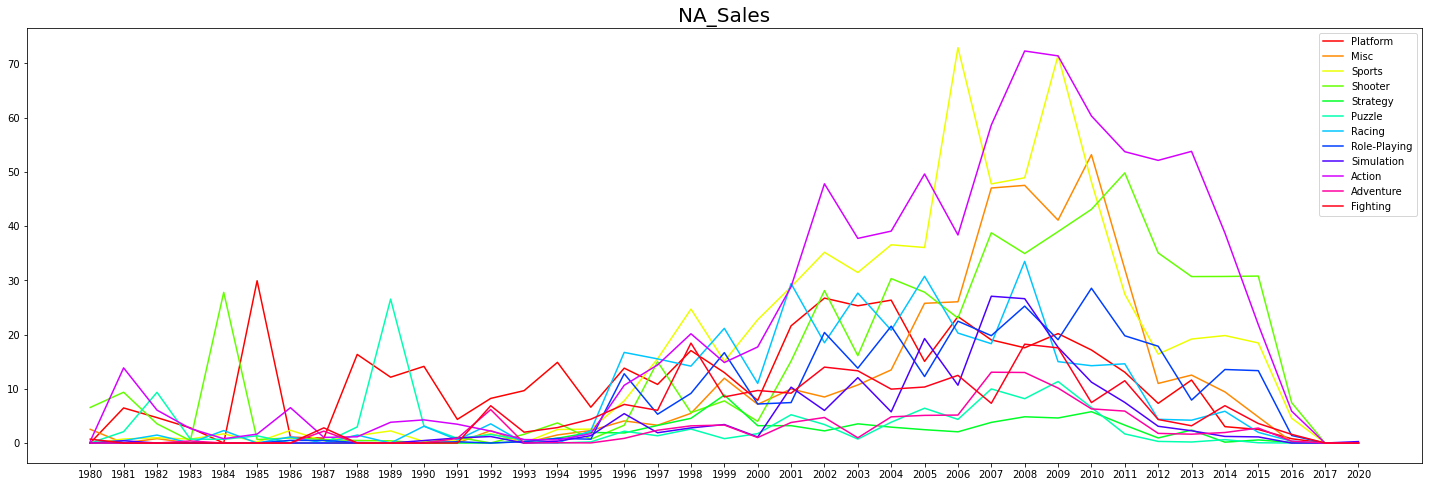

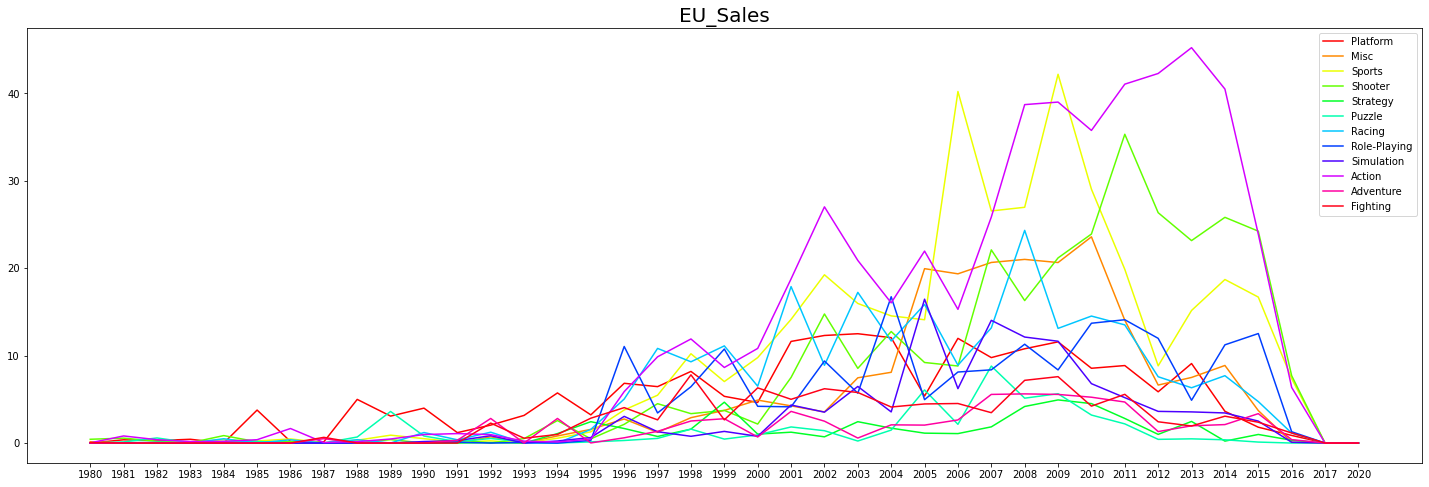

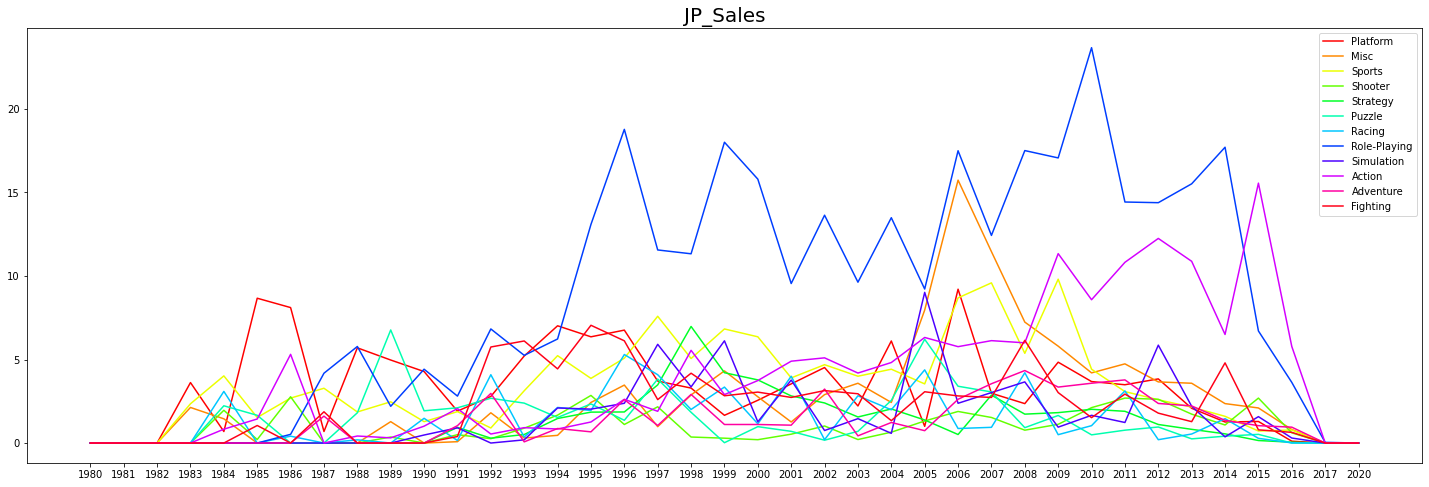

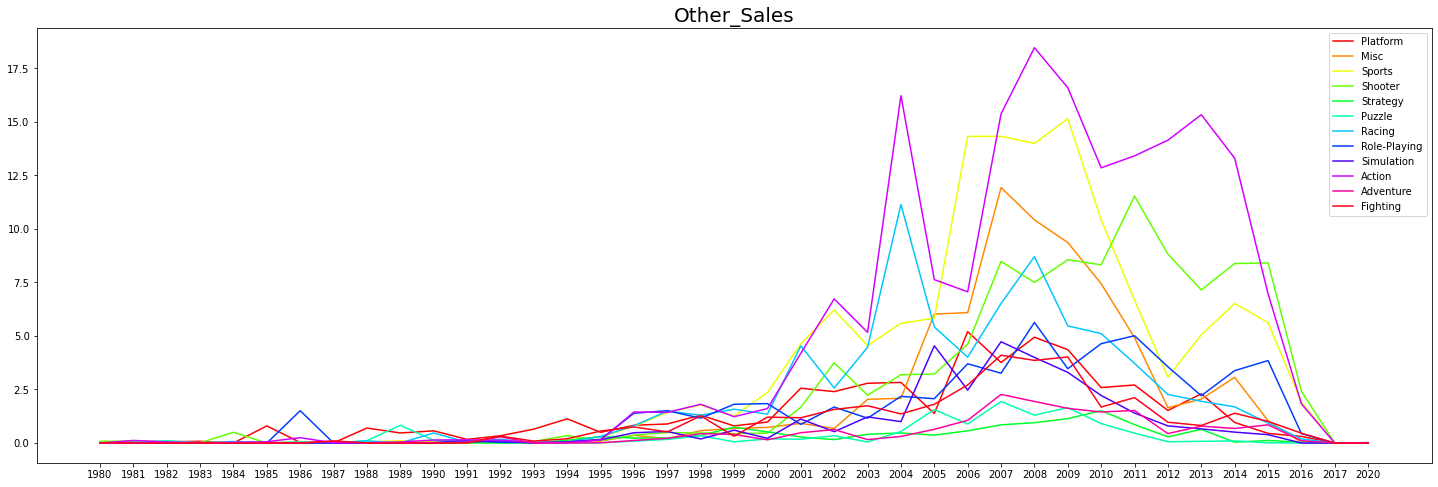

In [ ]:
def get_cmap(n, name = 'hsv'):
  return plt.cm.get_cmap(name, n)
cmap = get_cmap(len(set(df_clean['Genre'])))

for col in col_list:
  i = 0
  plt.figure(figsize = (25, 8))
  plt.title(col, fontsize = 20)
  year_df = pd.DataFrame(year_list, columns = ['Year'])
  year_df
  for genre in list(set(df_clean['Genre'])):
    df_all = df_clean[df_clean['Genre'] == genre][[col]].groupby(df_clean['Year']).sum()
    df_all.reset_index(inplace = True)
    df_merge = pd.merge(year_df, df_all, how = 'outer', on = 'Year')
    df_merge.fillna(0, inplace = True)
    plt.plot(year_list, df_merge[col], color = cmap(i), label = genre)
    i += 1
    plt.legend()

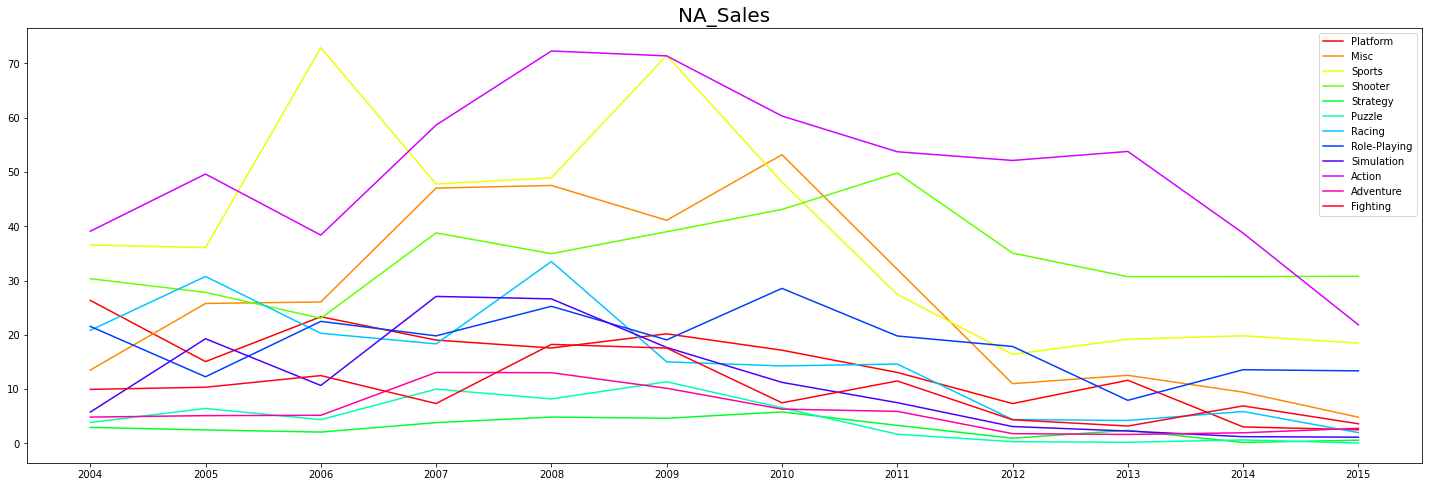

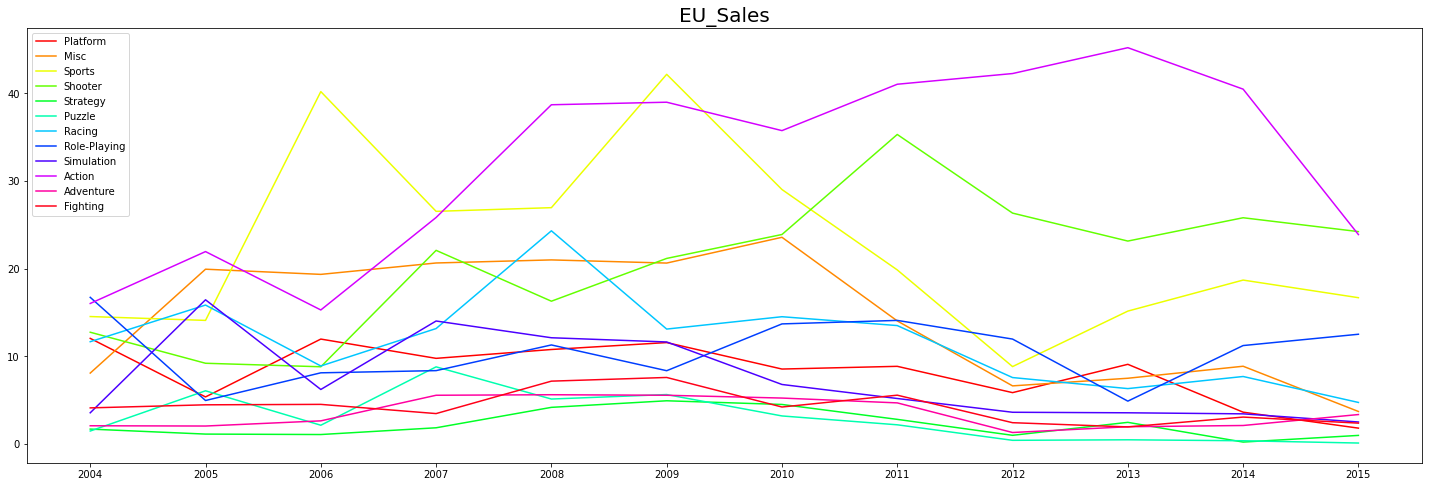

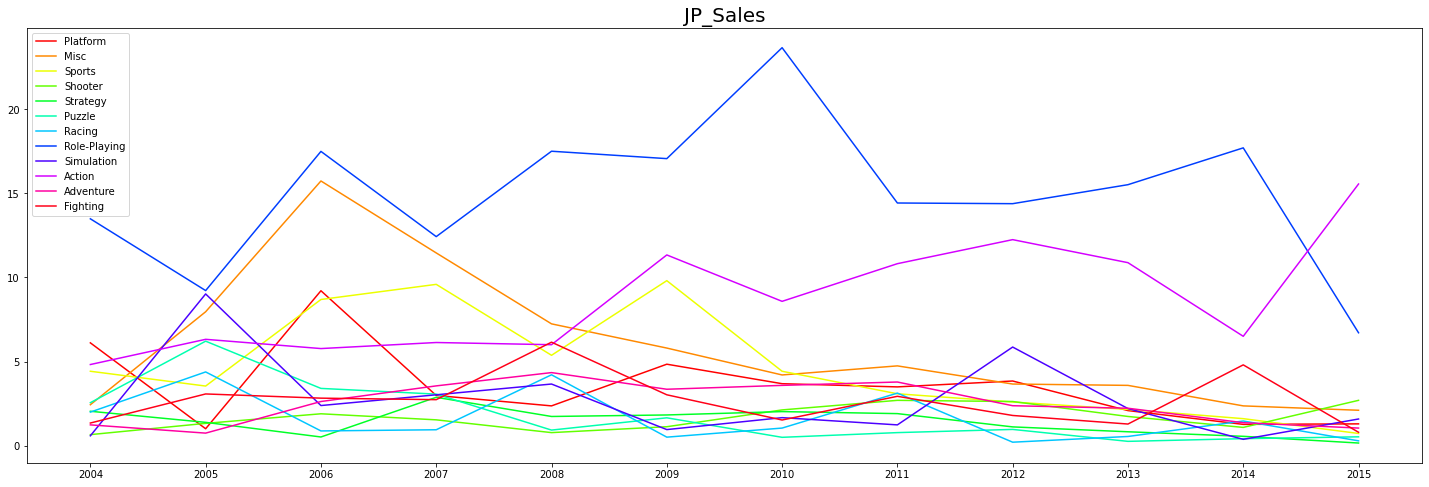

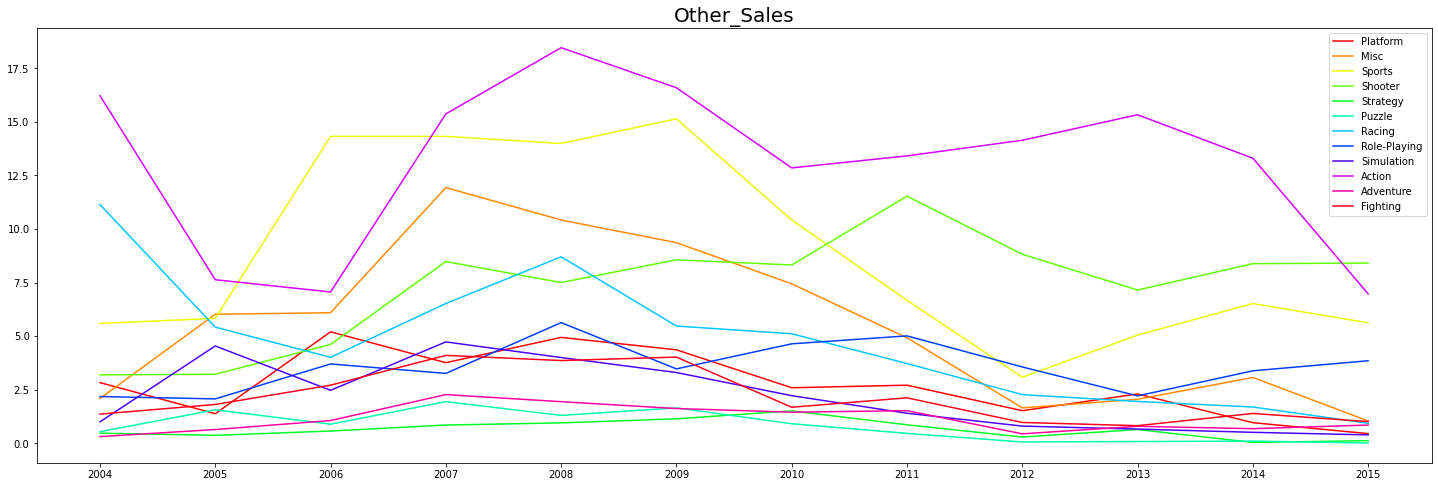

In [ ]:
for col in col_list:
  i = 0
  plt.figure(figsize = (25, 8))
  plt.title(col, fontsize = 20)
  year_df = pd.DataFrame(year_list, columns = ['Year'])
  year_df
  for genre in list(set(df_clean['Genre'])):
    df_all = df_clean[df_clean['Genre'] == genre][[col]].groupby(df_clean['Year']).sum()
    df_all.reset_index(inplace = True)
    df_merge = pd.merge(year_df, df_all, how = 'outer', on = 'Year')
    df_merge.fillna(0, inplace = True)
    plt.plot(year_list[-15:-3], df_merge[col][-15:-3], color = cmap(i), label = genre)
    i += 1
    plt.legend()

## 3. 출고량 높은 게임 분석

In [ ]:
comp_top_10_count = df_clean[['Publisher']].value_counts()[:10]
comp_top_10_counts = pd.DataFrame(comp_top_10_count, columns = ['Counts'])
comp_top_10_counts.reset_index(inplace = True)
comp_top_10_counts

,Publisher,Counts
0,Electronic Arts,1332
1,Activision,963
2,Namco Bandai Games,924
3,Ubisoft,913
4,Konami Digital Entertainment,821
5,THQ,711
6,Nintendo,692
7,Sony Computer Entertainment,679
8,Sega,631
9,Take-Two Interactive,411


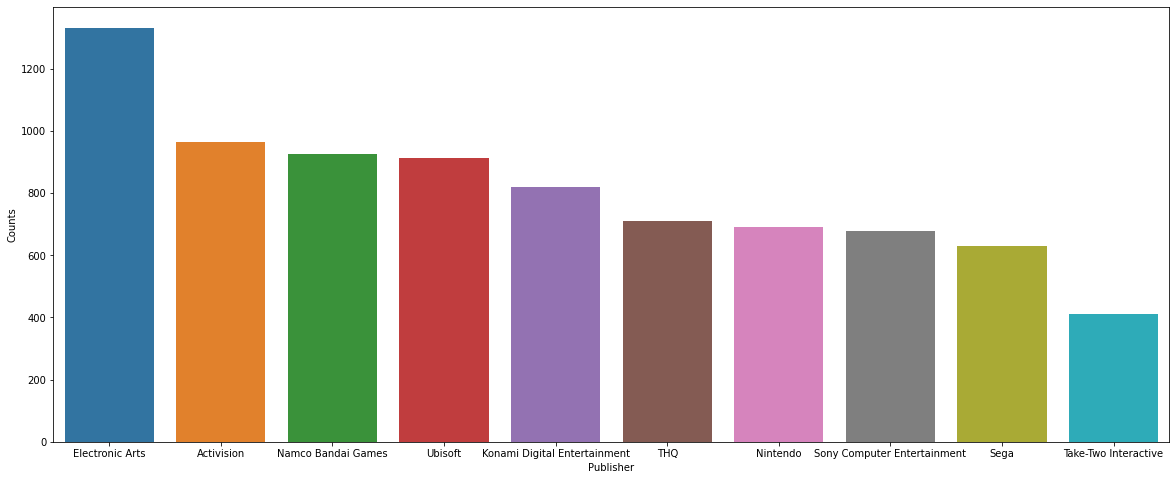

In [ ]:
plt.figure(figsize = (20, 8))
sns.barplot(data = comp_top_10_counts, x = 'Publisher', y = 'Counts')

In [ ]:
comp_top_10_sales = df_clean[['All_Sales']].groupby(df_clean['Publisher']).sum().sort_values(by = 'All_Sales', ascending = False)[:10]
comp_top_10_sales.reset_index(inplace = True)
comp_top_10_sales
plt.figure(figsize = (20, 8))
sns.barplot(data = comp_top_10_sales, x = 'Publisher', y = 'All_Sales')

,Publisher,All_Sales
0,Nintendo,1759.58
1,Electronic Arts,1087.18
2,Activision,719.36
3,Sony Computer Entertainment,603.58
4,Ubisoft,472.70
5,Take-Two Interactive,398.57
6,THQ,340.18
7,Konami Digital Entertainment,277.89
8,Sega,269.56
9,Namco Bandai Games,252.80


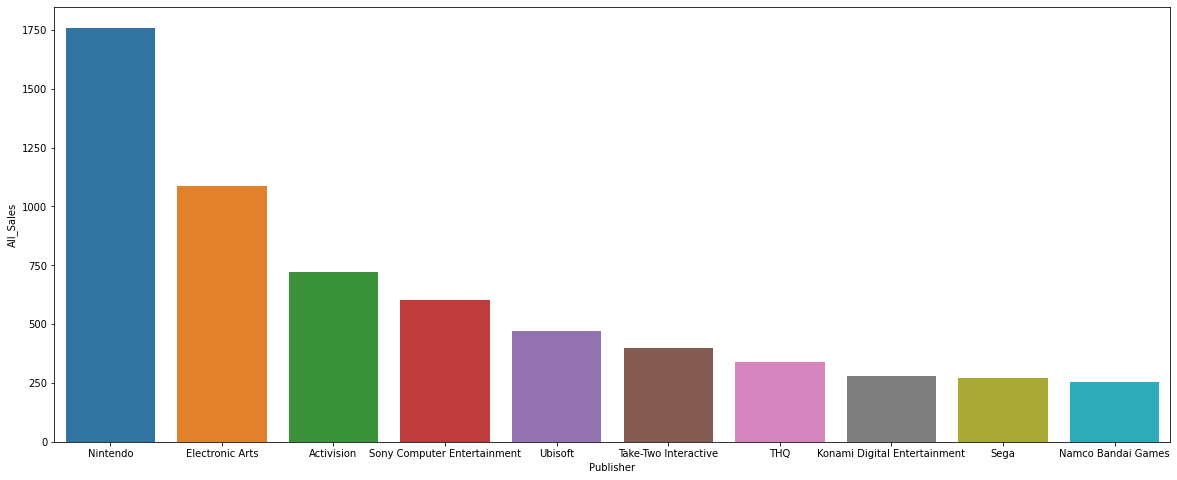

In [ ]:
plt.figure(figsize = (20, 8))
sns.barplot(data = comp_top_10_sales, x = 'Publisher', y = 'All_Sales')

In [ ]:
# df_clean[['All_Sales']].groupby([comp_top_10_sales['Publisher'], df_clean['Platform']]).sum()
df_clean[['All_Sales']].groupby(comp_top_10_sales['Publisher']).sum()

,All_Sales
Publisher,
Activision,1.05
Electronic Arts,2.76
Konami Digital Entertainment,1.15
Namco Bandai Games,0.42
Nintendo,0.77
Sega,0.22
Sony Computer Entertainment,0.27
THQ,4.31
Take-Two Interactive,0.23


In [ ]:
df_clean.query('Publisher == "Nintendo"')

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,All_Sales
90,Mario Bros.,NES,1983,Platform,Nintendo,0.51,0.12,1.63,0.02,2.28
95,Baseball,NES,1983,Sports,Nintendo,0.73,0.10,2.35,0.02,3.20
96,Donkey Kong,NES,1983,Platform,Nintendo,0.23,0.05,0.84,0.01,1.13
97,Donkey Kong Jr.,NES,1983,Platform,Nintendo,0.33,0.07,0.70,0.01,1.11
99,Mahjong,NES,1983,Misc,Nintendo,0.01,0.00,2.13,0.00,2.14
...,...,...,...,...,...,...,...,...,...,...
15954,Mario & Sonic at the Rio 2016 Olympic Games,WiiU,2016,Action,Nintendo,0.03,0.11,0.10,0.01,0.25
16036,Mario & Sonic at the Rio 2016 Olympic Games,3DS,2016,Action,Nintendo,0.04,0.16,0.24,0.01,0.45
16047,Metroid Prime: Federation Force,3DS,2016,Action,Nintendo,0.02,0.01,0.01,0.00,0.04
16168,Culdcept Revolt,3DS,2016,Strategy,Nintendo,0.00,0.00,0.05,0.00,0.05


In [ ]:
market_list = col_list + ['All_Sales']
market_list

['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'All_Sales']

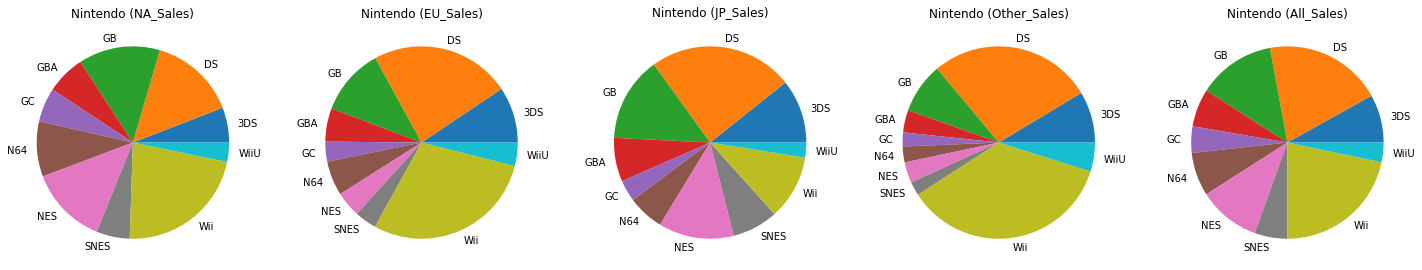

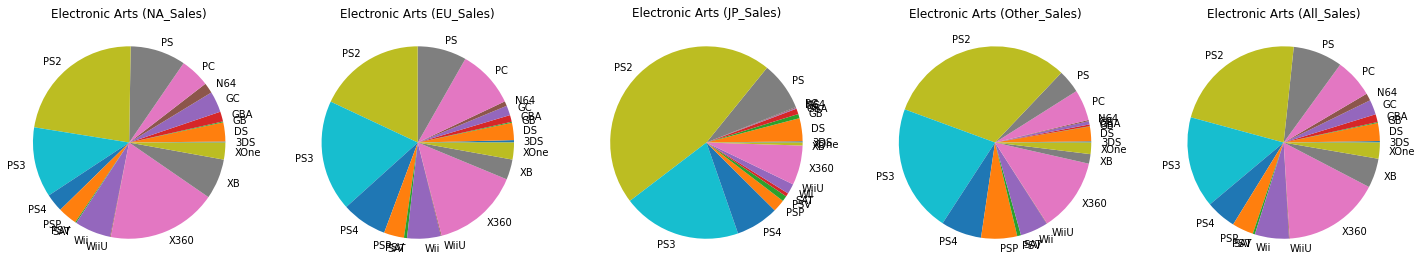

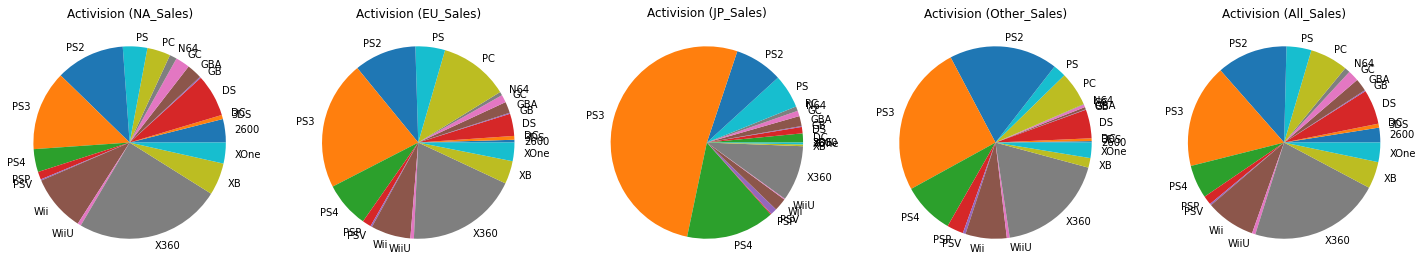

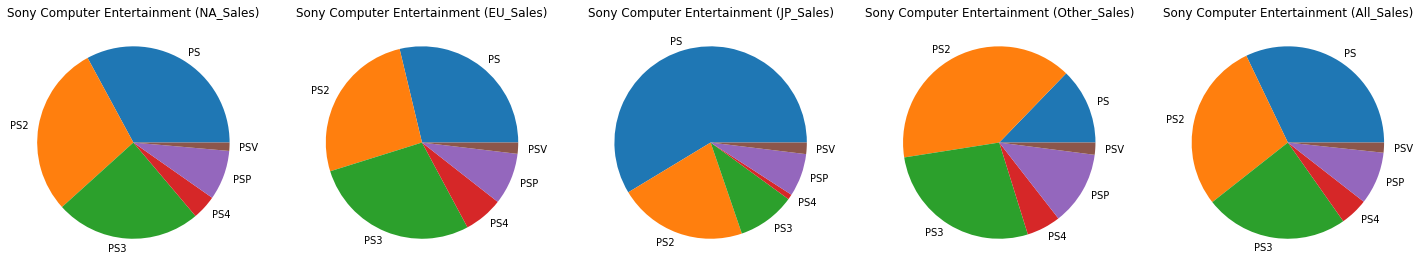

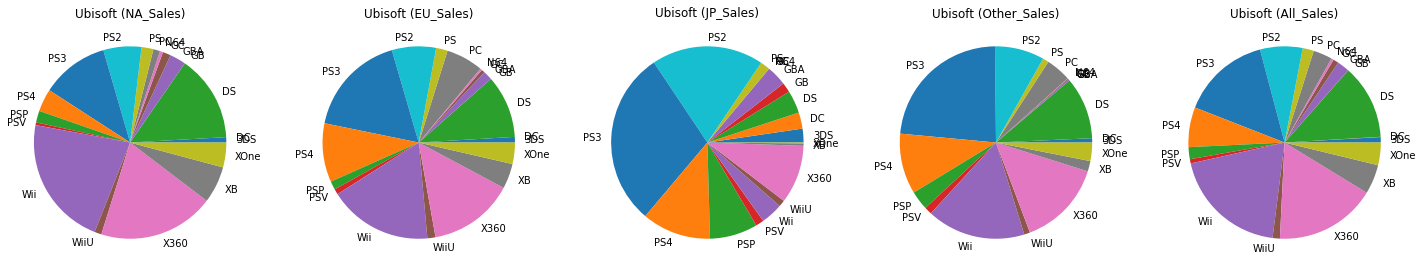

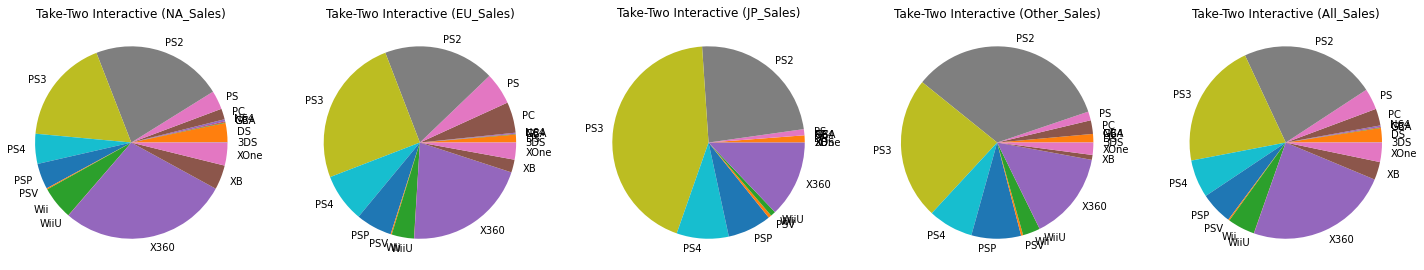

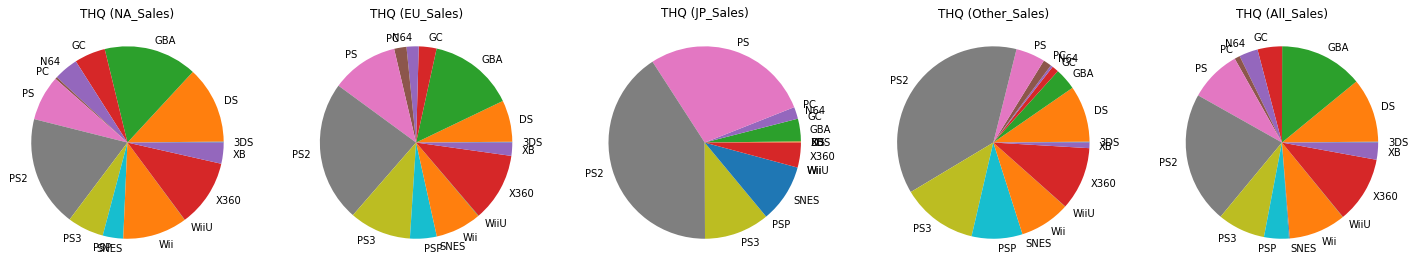

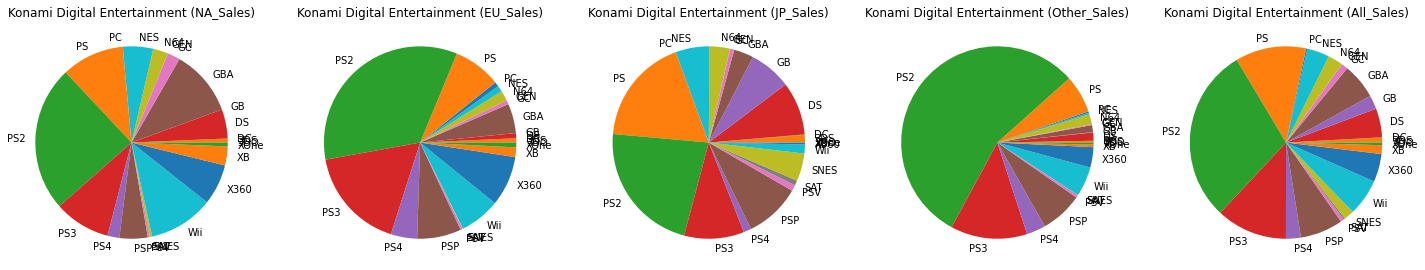

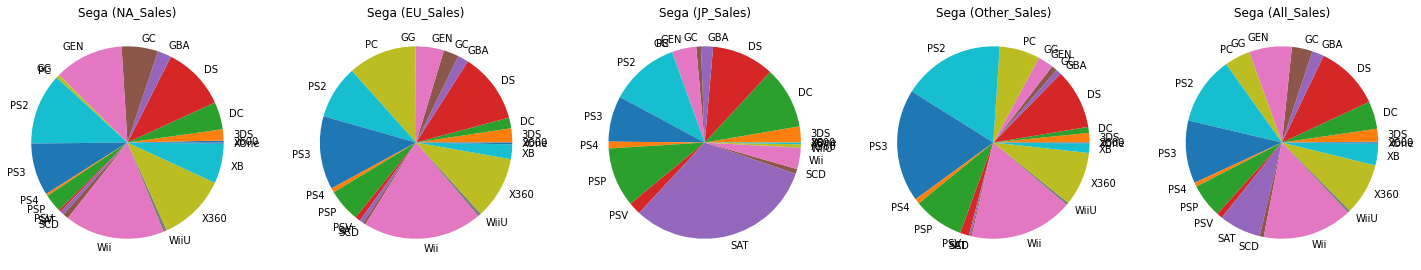

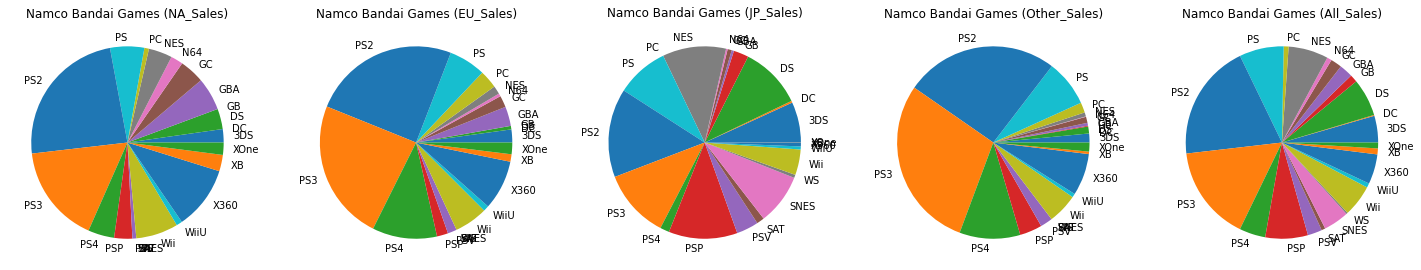

In [ ]:
for comp in comp_top_10_sales['Publisher']:
  i = 1
  plt.figure(figsize = (25, 8))
  for market in market_list:
    plt.subplot(1, 5, i)
    plt.title('%s (%s)' % (comp, market))
    df_comp = df_clean[df_clean['Publisher'] == comp]
    df_ratio = df_comp.groupby('Platform').sum()
    df_ratio.reset_index(inplace = True)
    plt.pie(df_ratio[market], labels = df_ratio['Platform'])
    i += 1

In [ ]:
df_comp = df_clean[df_clean['Publisher'] == comp]
df_ratio = df_comp.groupby('Platform').sum()
df_ratio.reset_index(inplace = True)
df_ratio

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,All_Sales
0,3DS,1.55,0.93,8.64,0.22,11.34
1,DC,0.00,0.00,0.38,0.00,0.38
2,DS,2.36,0.25,13.22,0.17,16.00
3,GB,0.00,0.00,3.21,0.02,3.23
4,GBA,3.81,1.39,0.48,0.07,5.75
5,GC,2.89,0.83,0.88,0.15,4.75
6,N64,1.42,0.21,0.35,0.01,1.99
7,NES,2.74,0.59,13.52,0.10,16.95
8,PC,0.53,1.30,0.00,0.25,2.08
9,PS,3.96,2.63,11.15,1.14,18.88


In [ ]:

df_clean['Year'] = df_clean['Year'].astype(int)

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16241 entries, 0 to 16240
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  int64  
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  float64
 6   EU_Sales     16241 non-null  float64
 7   JP_Sales     16241 non-null  float64
 8   Other_Sales  16241 non-null  float64
 9   All_Sales    16241 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.2+ MB


In [ ]:
df_10years = df_clean[(df_clean['Year'] >= 2005) & (df_clean['Year'] <= 2015)]
df_10years.shape

(10759, 10)

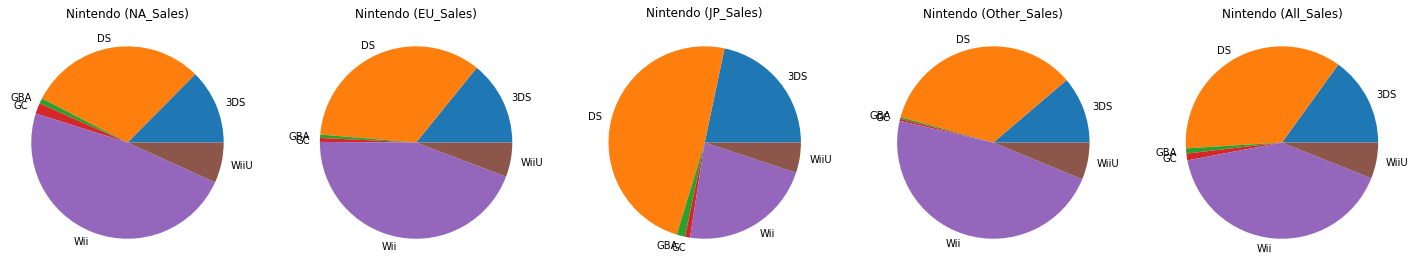

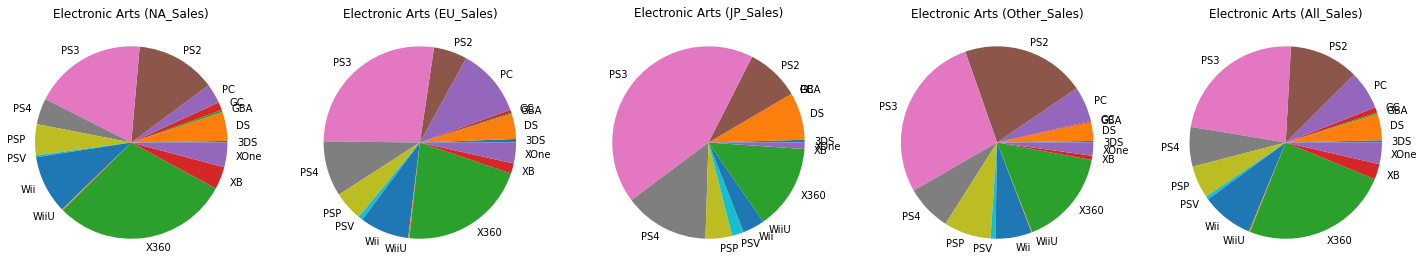

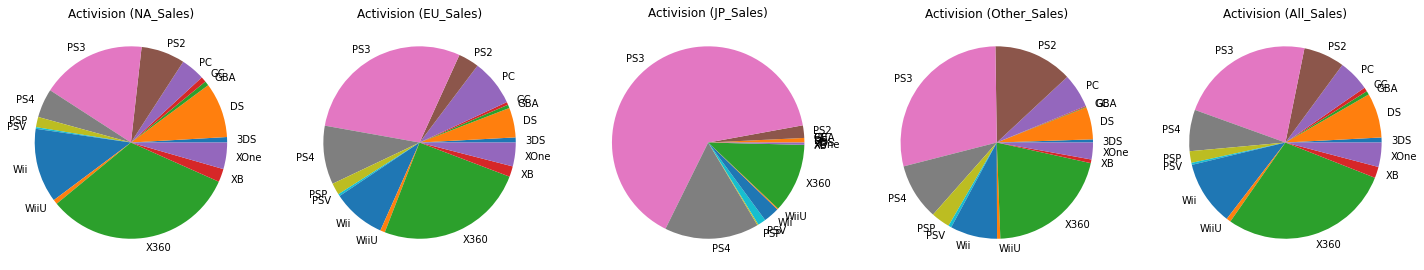

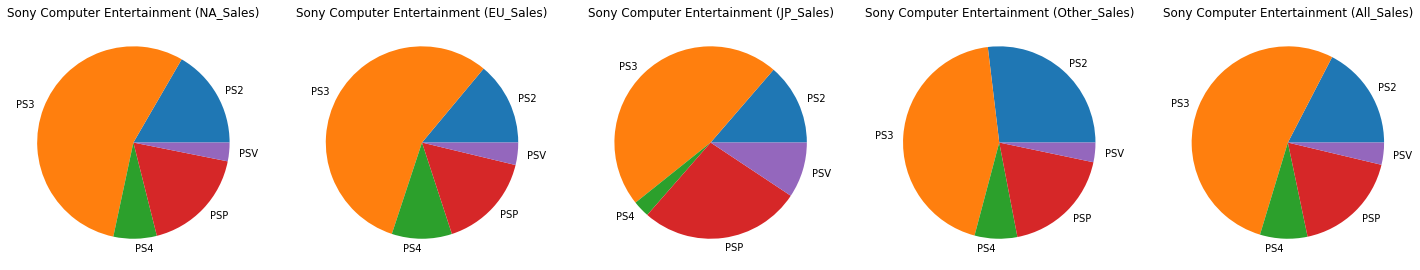

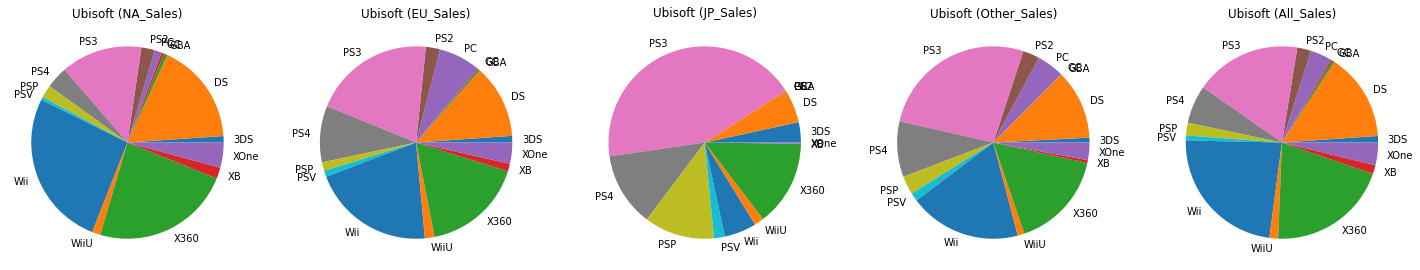

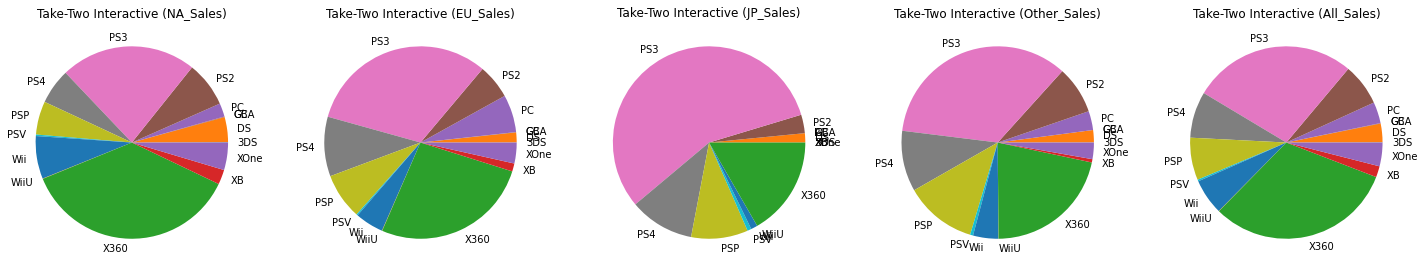

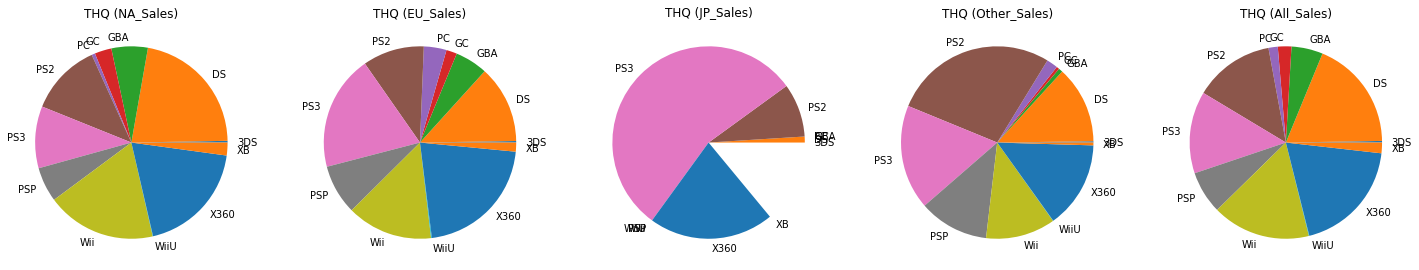

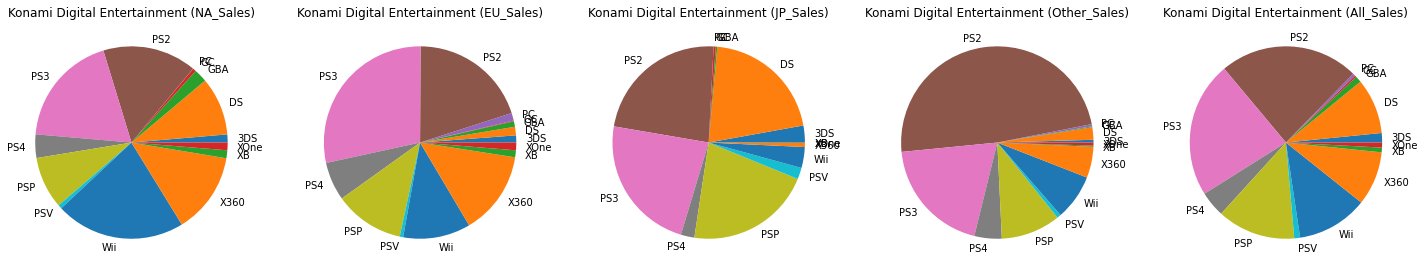

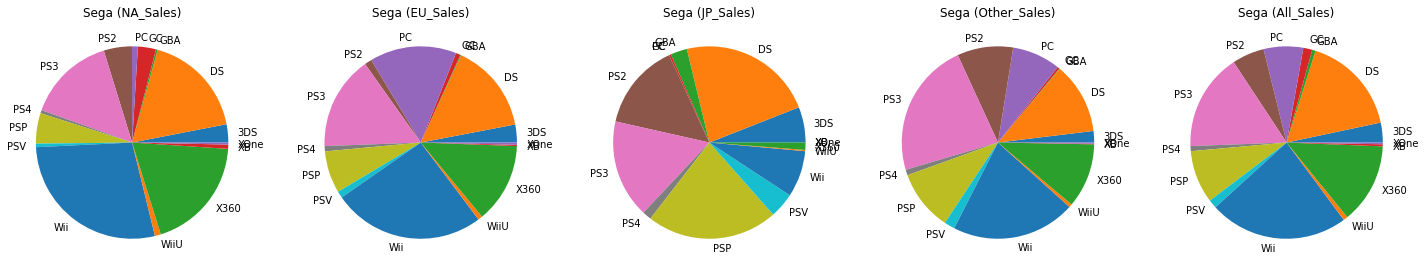

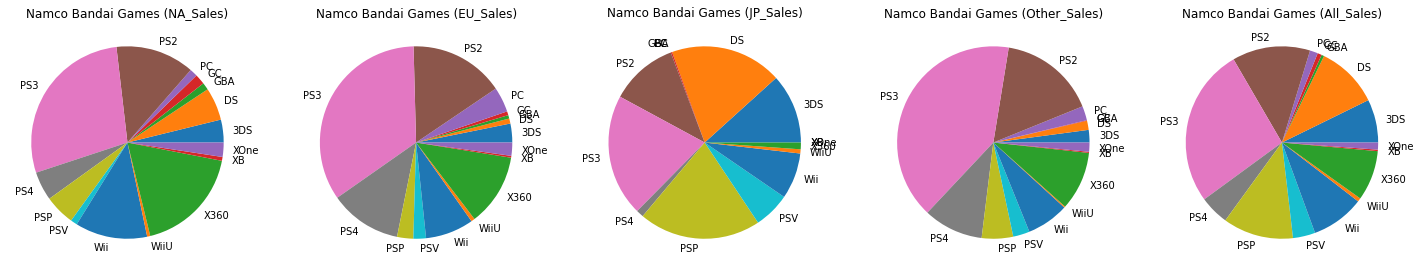

In [ ]:
for comp in comp_top_10_sales['Publisher']:
  i = 1
  plt.figure(figsize = (25, 8))
  for market in market_list:
    plt.subplot(1, 5, i)
    plt.title('%s (%s)' % (comp, market))
    df_comp = df_10years[df_10years['Publisher'] == comp]
    df_ratio = df_comp.groupby('Platform').sum()
    df_ratio.reset_index(inplace = True)
    plt.pie(df_ratio[market], labels = df_ratio['Platform'])
    i += 1